### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。
* [Smart自學網](https://smart.businessweekly.com.tw/) — [K線追擊週報](https://smart.businessweekly.com.tw/e-subscription/channel?c=GROUP00014146)：  
  各位同學好，  
  因 1/3 系統異常，未能如期執行信用卡扣款，已於 1/4 晚間由資訊人員完成修復並補上扣款作業。  
  期間曾取消原訂閱並重新下單的同學，訂閱與觀看權益皆未受影響。  
  若仍有同學發現重複下單或重複扣款的情況，請再協助透過 官方 LINE @ 與我們聯繫，我們將儘速協助確認與處理。  

* 引入模組與定義公用函式  

In [3]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [ ]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [ ]:
mysys.UpdatestockDatabase()

* 建立「解盤」物件    

In [ ]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **開盤**：指數跳空開高518點。  
> 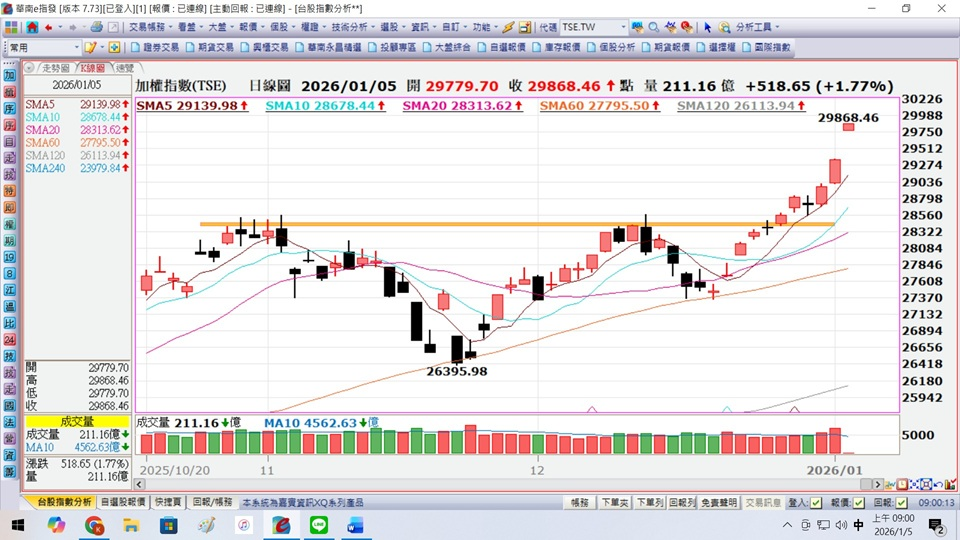   

In [4]:
# 支撐線
def line_drawing_callback( range_prices) :

    # 支撐線
    support_line_start_date = range_prices.iloc[0].name.strftime("%Y-%m-%d")
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2025-12-10']['High']
    
    seq_of_seq_of_points=[
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.5]
    
    colors=['xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

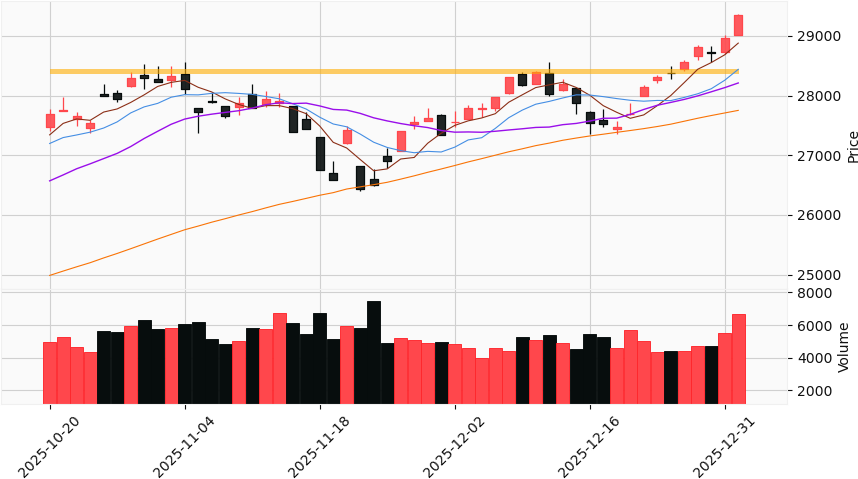

In [5]:
# 收盤：支撐線
image = mysys.DrawOnKlineChart('TAIEX','2025-10-20','2026-01-02',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買也持續上漲。  
> 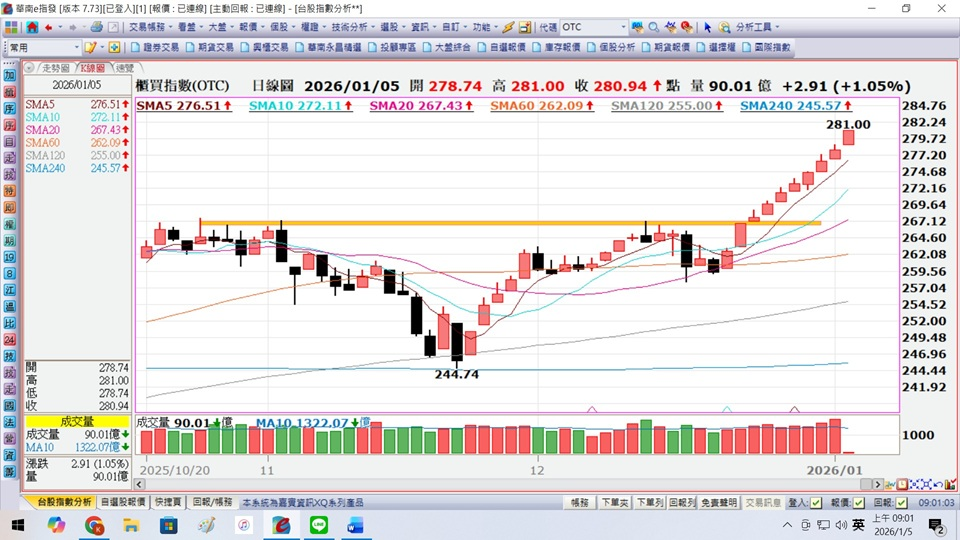  

In [6]:
# 支撐線
def line_drawing_callback( range_prices) :

    # 支撐線
    support_line_start_date = range_prices.iloc[0].name.strftime("%Y-%m-%d")
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2025-12-22']['Close']
    
    seq_of_seq_of_points=[
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[3.0]
    
    colors=['xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

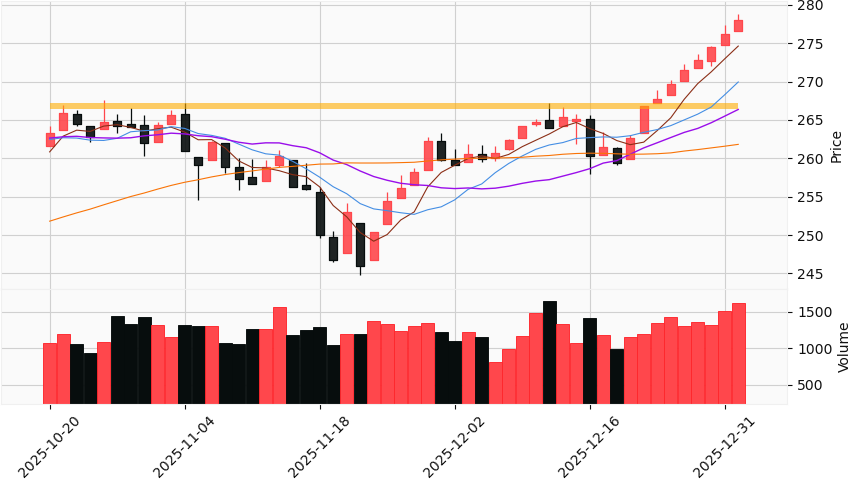

In [8]:
# 收盤：支撐線
image = mysys.DrawOnKlineChart('TPEx','2025-10-20','2026-01-02',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

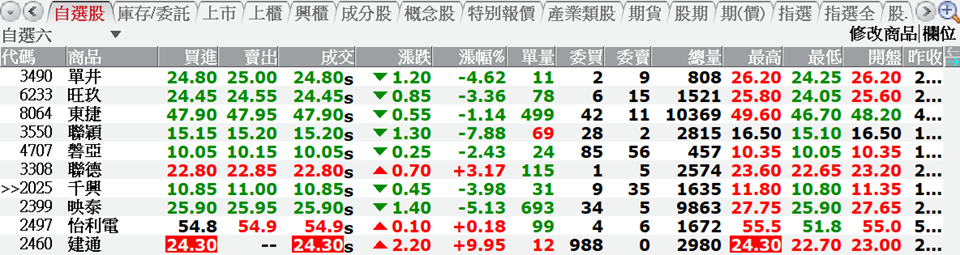  

* 建通(2460)  
  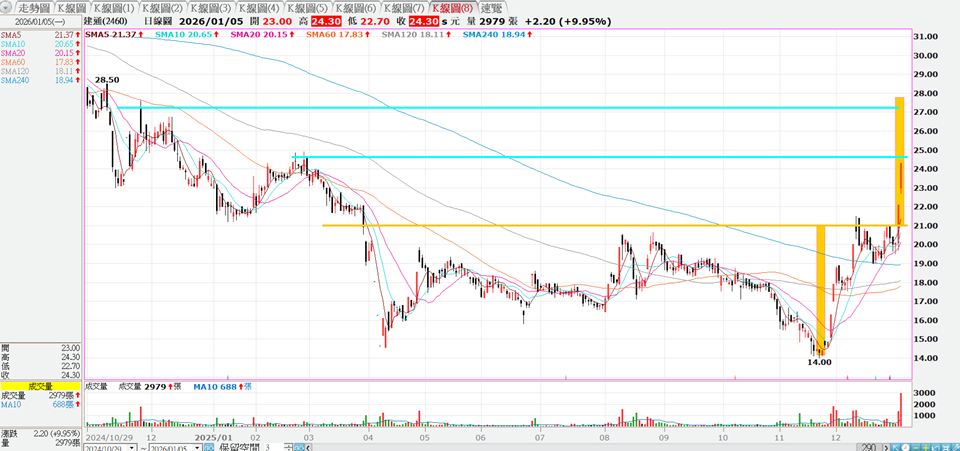  
* 旺宏(2337)  
  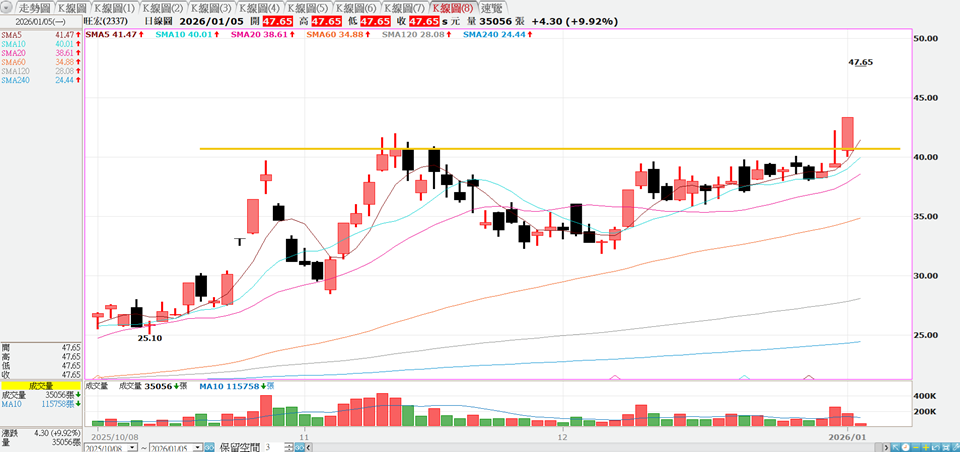  
* 鈺創(5351)  
  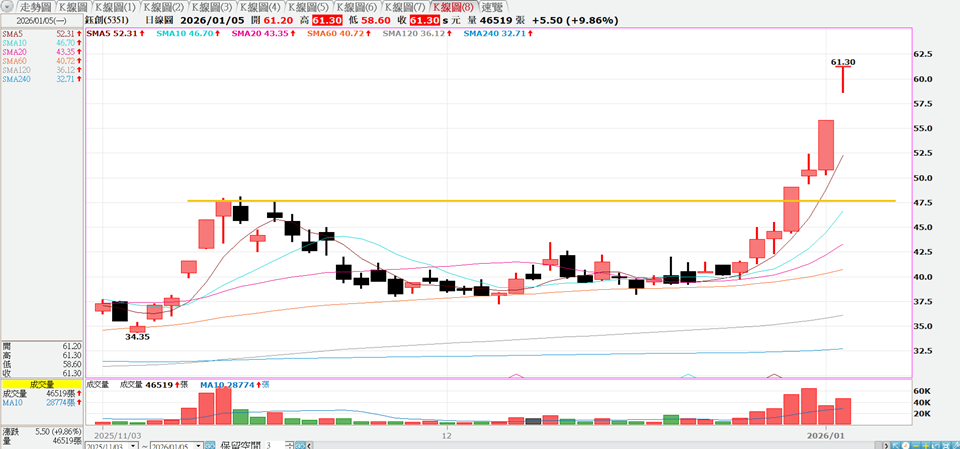  
* 華邦電(2344)  
  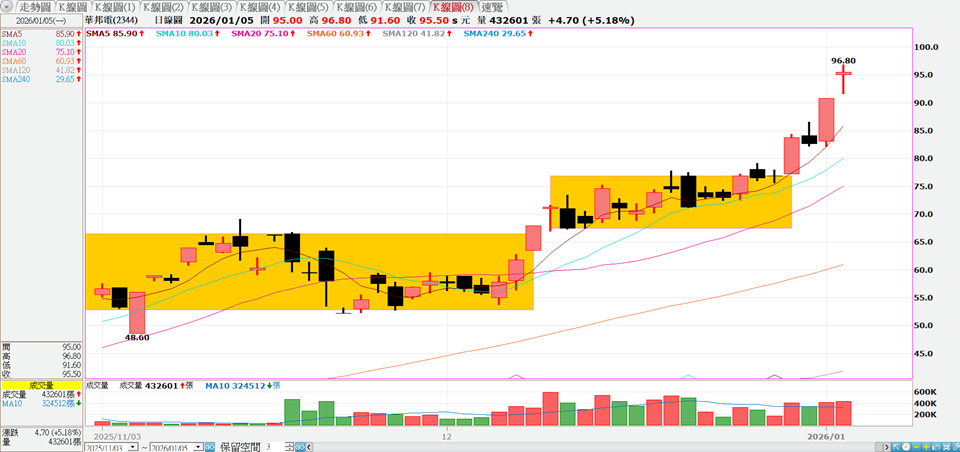  
* 福懋科(8131)  
  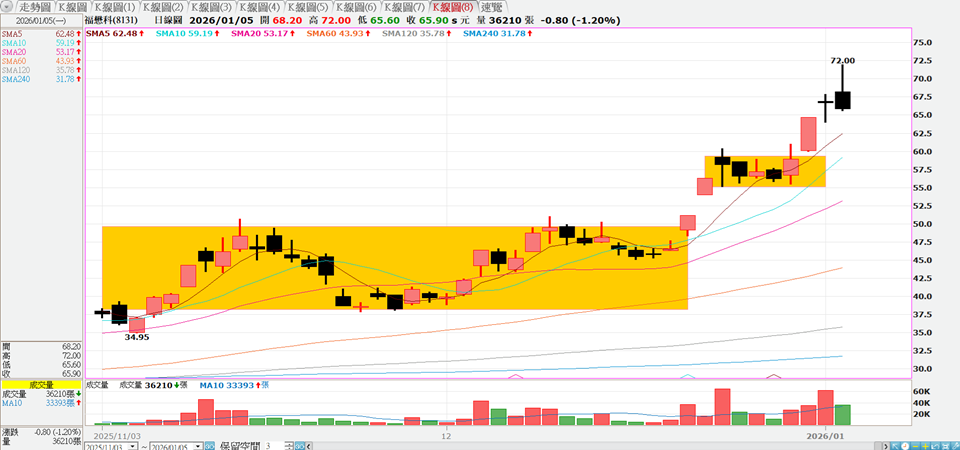  
* 昶昕(8438)  
  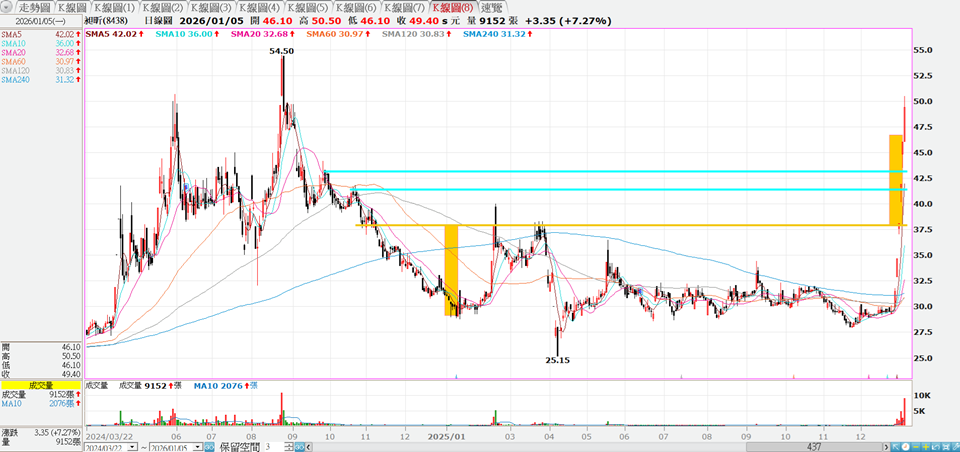  
* 尚立(3360)  
  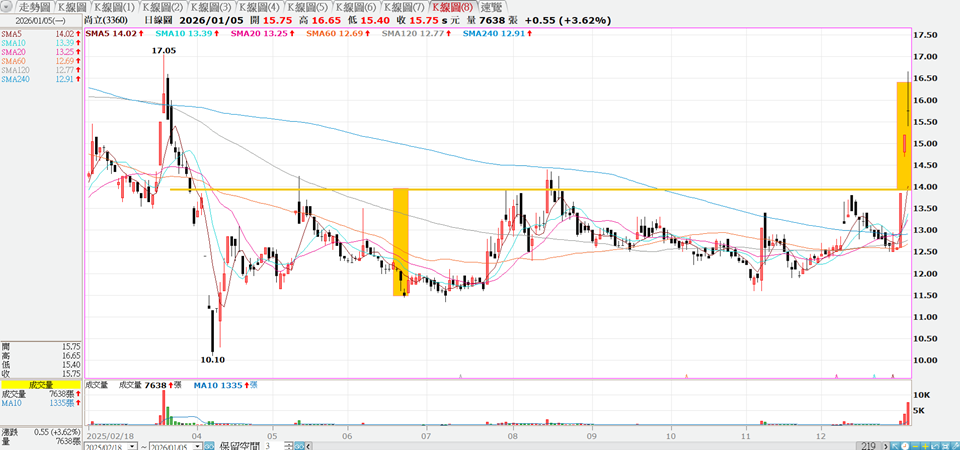  
* 聯德(3308)  
  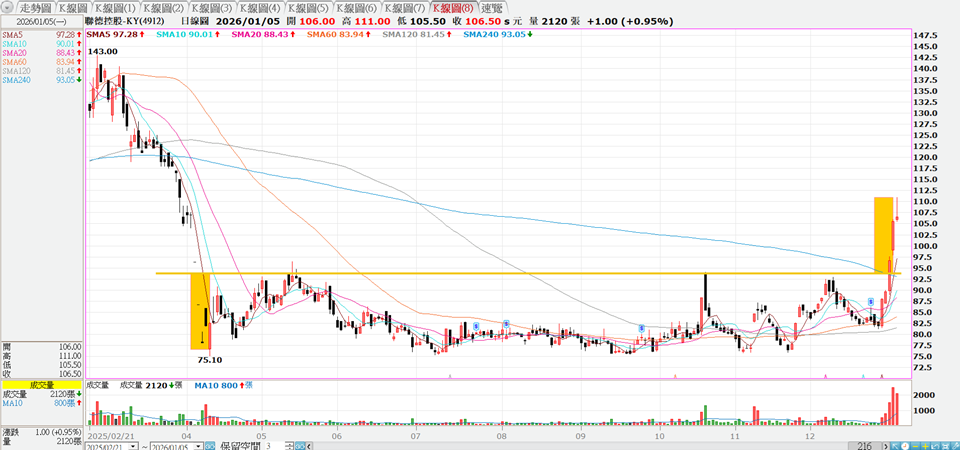  
* 聯德控股-KY(4912)  
  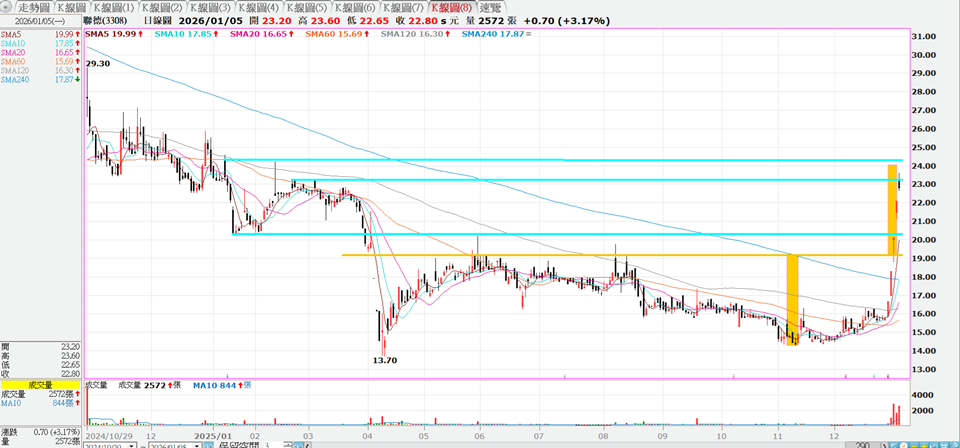     
* 千興(2025)  
  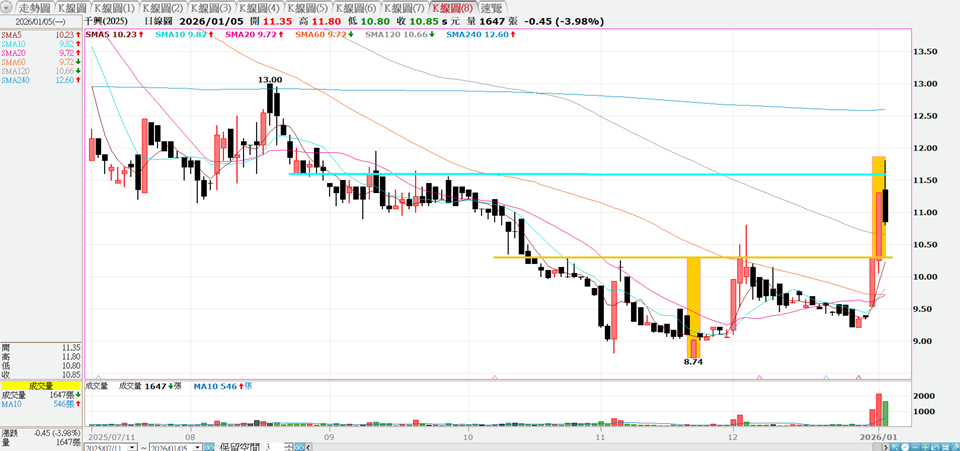  

### 個股解盤  

* 聯穎(3550)  
  看法：跌破頸線與(上楊)五日線，這檔個股追蹤至今日。  

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'3550')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-13'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-09-02']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-04-10'
    bottom_price = range_prices.loc['2025-04-10']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-12-31'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('3550','2025-02-14','2026-01-02',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資○○( )、融券○○( )。  

* 千興(2025)  
  看法：。  

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'2025',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-10-15'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-02']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-21'
    bottom_price = range_prices.loc['2025-11-21']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-02'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('2025','2025-08-28','2026-01-02',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資○○( )、融券○○( )。  